## CNN - Convolutional neural networks

In [26]:
import tensorflow as tf
import keras

# Tensorboard  helps to visualise as the the data trains itself.
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np

# Data visulaisation
import matplotlib.pyplot as plt
import cv2


### Load the data
### Split into train and test

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print("Training Data shape is {}".format(x_train.shape))
print("Training Labels shape is {}".format(y_train.shape))
print("Test Data shape is {}".format(x_test.shape))
print("Test Labels shape is {}".format(y_test.shape))

Training Data shape is (60000, 28, 28)
Training Labels shape is (60000,)
Test Data shape is (10000, 28, 28)
Test Labels shape is (10000,)


In [6]:
print("Sample training data is {}".format(x_train[0]))

Sample training data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [7]:
print("Sample training labels {}".format(y_train[0:5]))

Sample training labels [5 0 4 1 9]


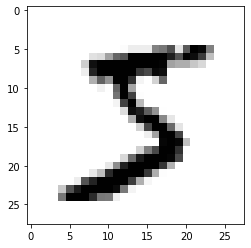

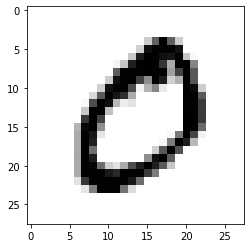

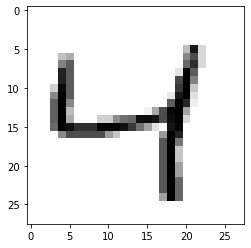

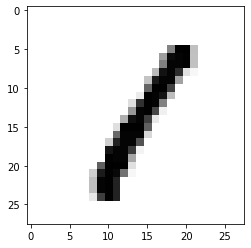

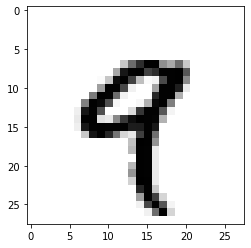

In [9]:
for i in range(5):
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.show()

#### Scale the data between 0 and 1

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [12]:
print("Training Data after normalizing is {}".format(x_train[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

####  Build the model

In [17]:
# Sequential means putting bunch of layers one ahead of other
# Flatten - Taking an N-dimensional array and converting it into a single long continuous 1-D array.
# Dense - Each neuron is connected to every other input output
# Activation function relu/softmax - It denotes whether neuron should fire or notfire.
# compile - Adds up everything
# Too many epocs may overfit the model


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 3 )

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9239
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1090 - accuracy: 0.9657
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0735 - accuracy: 0.9769


In [23]:
# Each prediction is set of 10 probabilities.
predictions = model.predict(x_test)

In [24]:
print("Probaility distribution for a multiclass classification")
predictions[0]

Probaility distribution for a multiclass classification


array([1.7277902e-08, 6.1721551e-08, 1.1077358e-05, 1.1777311e-05,
       6.5677838e-11, 1.5587929e-07, 1.3223645e-12, 9.9997616e-01,
       1.5090944e-07, 6.5489149e-07], dtype=float32)

In [27]:
# Argmax shows out of 10 probablities which postion has max value.
print(np.argmax(predictions[0]))

7


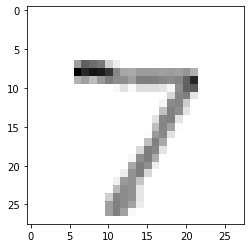

In [28]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 818us/step - loss: 0.0895 - accuracy: 0.97170s - loss: 0.0895 - accuracy: 0.97
0.08947180956602097 0.9717000126838684
